In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from settings import *

In [17]:
servo_0_range = [0, 130]
servo_1_range = [30, 150]
servo_2_range = [-60, 60]
servo_3_range = [-60, 60]


In [18]:
servo_0_degrees = np.linspace(servo_0_range[0], servo_0_range[1])
servo_1_degrees = np.linspace(servo_1_range[0], servo_1_range[1])
servo_2_degrees = np.linspace(servo_2_range[0], servo_2_range[1])
servo_3_degrees = np.linspace(servo_3_range[0], servo_3_range[1])

In [19]:
def degrees_to_pw(degrees, center, multiplier):
    return center + degrees * multiplier * 10

In [20]:
servo_0_pws = []
servo_1_pws = []
servo_2_pws = []
servo_3_pws = []


for degree in servo_0_degrees:
    servo_0_pws.append(degrees_to_pw(degree, servo_0_center, servo_0_direction))
for degree in servo_1_degrees:
    servo_1_pws.append(degrees_to_pw(degree, servo_1_center, servo_1_direction))
for degree in servo_2_degrees:
    servo_2_pws.append(degrees_to_pw(degree, servo_2_center, servo_2_direction))
for degree in servo_3_degrees:
    servo_3_pws.append(degrees_to_pw(degree, servo_3_center, servo_3_direction))

In [21]:
# Read the calibration data from the CSV file
calibration_data = pd.read_csv('callibration.csv')

# Filter the data for servo 0
servo_0_data = calibration_data[calibration_data['servo'] == 0]
servo_1_data = calibration_data[calibration_data['servo'] == 1]
servo_2_data = calibration_data[calibration_data['servo'] == 2]

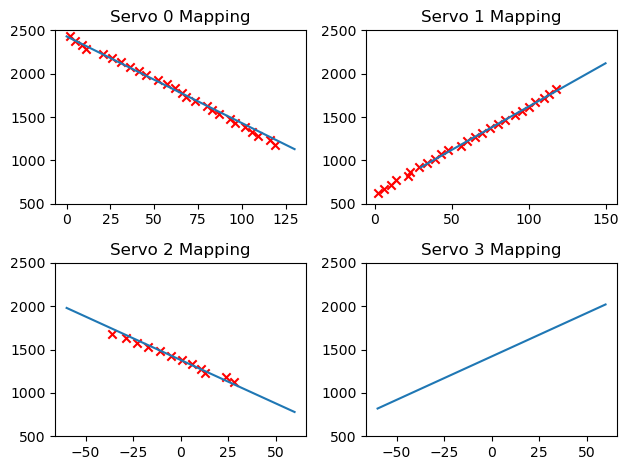

In [22]:

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Top-left (0, 0) plot: servo_0_degrees
axs[0, 0].plot(servo_0_degrees, servo_0_pws)
axs[0, 0].set_ylim([500, 2500])
axs[0, 0].set_title('Servo 0 Mapping')
axs[0, 0].scatter(servo_0_data['theta_true'], servo_0_data['pw'], color='red', label='Calibration Points', marker='x')

# Top-right (0, 1) plot: servo_1_degrees
axs[0, 1].plot(servo_1_degrees, servo_1_pws)
axs[0, 1].set_ylim([500, 2500])
axs[0, 1].set_title('Servo 1 Mapping')
axs[0, 1].scatter(servo_1_data['theta_true'], servo_1_data['pw'], color='red', label='Calibration Points', marker='x')

# Bottom-left (1, 0) plot: servo_2_degrees
axs[1, 0].plot(servo_2_degrees, servo_2_pws)
axs[1, 0].set_ylim([500, 2500])
axs[1, 0].set_title('Servo 2 Mapping')
axs[1, 0].scatter(servo_2_data['theta_true'], servo_2_data['pw'], color='red', label='Calibration Points', marker='x')

# Bottom-right (1, 1) plot: servo_3_degrees
axs[1, 1].plot(servo_3_degrees, servo_3_pws)
axs[1, 1].set_ylim([500, 2500])
axs[1, 1].set_title('Servo 3 Mapping')

# Add spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()
